# Для 3 работы

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import sigmaclip
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data_train = pd.read_csv('./practice3/data/train.csv')
data_test = pd.read_csv('./practice3/data/test.csv')

In [3]:
def perform_change(ar):
    uniq_val = ar.unique()
    decoder = {}
    count = 1
    for i in uniq_val:
        if pd.isna(i):
            decoder[count] = i
            count += 1
            continue
        ar.replace(i, count, inplace=True)
        decoder[count] = i
        count += 1
    return decoder

def perform_decoder(ar, decoder):
    for key, value in decoder.items():
        ar.replace(key, value, inplace=True)

## Обработка данных

In [4]:
knnimpute_data = data_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()

# Закодируем категориальные столбцы
decoder_sex = perform_change(knnimpute_data['Sex'])
decoder_embarked = perform_change(knnimpute_data['Embarked'])

knn = KNNImputer(n_neighbors=5, weights='distance')

scaler = StandardScaler()

knnimpute_data = scaler.fit_transform(knnimpute_data) # стандартизируем

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # заполняем

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[[3]].astype(int)

data_train['Age'] = knnimpute_data.values

In [5]:
knnimpute_data = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()

# Закодируем категориальные столбцы
decoder_sex = perform_change(knnimpute_data['Sex'])
decoder_embarked = perform_change(knnimpute_data['Embarked'])

knnimpute_data = scaler.fit_transform(knnimpute_data) # стандартизируем

knnimpute_data_imputed_temp = knn.fit_transform(knnimpute_data) # заполняем

knnimpute_data = scaler.inverse_transform(knnimpute_data_imputed_temp)

knnimpute_data = pd.DataFrame(knnimpute_data)
knnimpute_data = knnimpute_data[[2]].astype(int)

data_test['Age'] = knnimpute_data.values

In [6]:
data_train.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
data_test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [8]:
decoder_sex = perform_change(data_train['Sex'])
decoder_emb = perform_change(data_train['Embarked'])

In [9]:
data_test.replace(np.nan, data_test['Embarked'].mode()[0], inplace=True)

In [10]:
decoder_sex_t = perform_change(data_test['Sex'])
decoder_emb_t = perform_change(data_test['Embarked'])

In [11]:
values_of_sigmaclip = sigmaclip(data_train['Fare'], low=1, high=4)

print(f"Нижняя граница Fare: {values_of_sigmaclip.lower}")
print(f"Верхняя граница Fare: {values_of_sigmaclip.upper}")

data_train = data_train[data_train['Fare'].isin(values_of_sigmaclip.clipped)]

Нижняя граница Fare: -0.8014583929911474
Верхняя граница Fare: 123.35064276961627


In [12]:
data_train = data_train[(data_train['Fare'] != 0) & (data_train['Age'] != 0)]

In [13]:
columns_to_scale = ['Age', 'Fare']
data_st = data_train[columns_to_scale]
data_scaled = scaler.fit_transform(data_st)
data_train[columns_to_scale] = data_scaled

In [14]:
data_st_t = data_test[columns_to_scale]
data_scaled_t = scaler.fit_transform(data_st_t)
data_test[columns_to_scale] = data_scaled_t

In [15]:
x = data_train.drop(columns=['Survived'])
y = data_train['Survived']

In [16]:
print(x)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1 -1.734222      3      1  0.037297         1
1         3    2 -0.231797      0      0 -0.692190         1
3         2    1 -0.374885      0      2 -0.401864         1
4         2    2 -2.020398      2      1  0.579238         1
6         3    2 -0.231797      2      0 -0.635627         1
..      ...  ...       ...    ...    ...       ...       ...
529       3    1 -1.948854      3      2  0.134739         1
530       3    1 -1.877310      3      1 -0.138568         1
531       3    2 -1.662678      3      1  0.037297         1
532       2    1 -0.374885      2      3 -0.231673         1
533       1    2  1.342172      0      0  0.080678         1

[496 rows x 7 columns]
0      0
1      0
3      1
4      1
6      0
      ..
529    0
530    0
531    0
532    1
533    1
Name: Survived, Length: 496, dtype: int64


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Построение и визуализация дерева решений

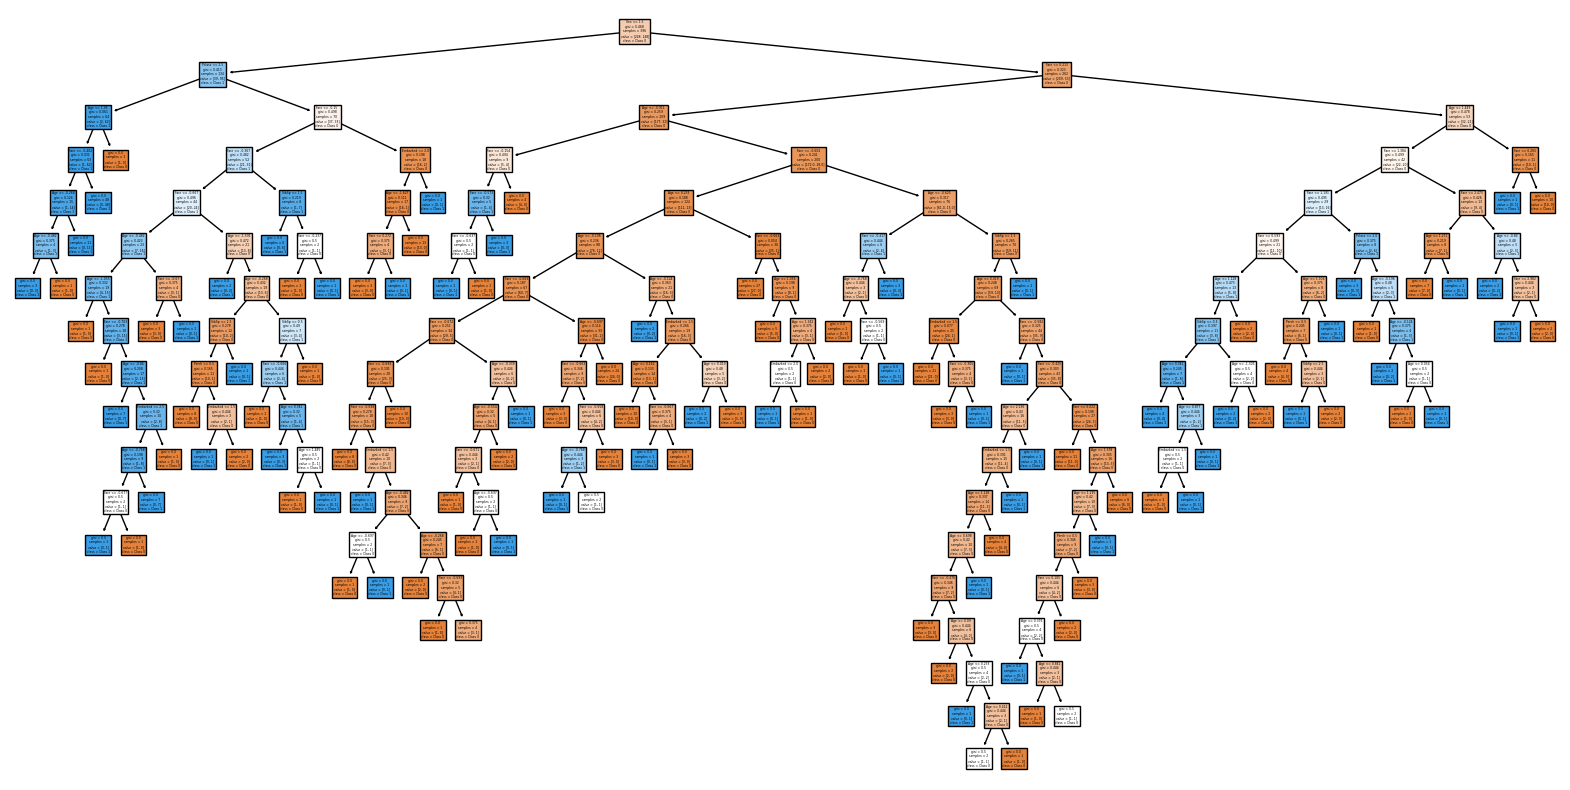

'titanic_decision_tree.png'

In [18]:
import os
# построение дерева решений
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'])
plt.show()

os.environ["PATH"] += os.pathsep + r'C:\Users\andre\Downloads\windows_10_cmake_Release_Graphviz-11.0.0-win64\Graphviz-11.0.0-win64\bin'

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=x.columns,  
                           class_names=['Class 0', 'Class 1'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Преобразование dot в график
graph = graphviz.Source(dot_data)  

# Сохранение графика в файл
# graph.format = 'png'
graph.render("titanic_decision_tree", format="png")


## Исследование зависимости качества прогнозирования

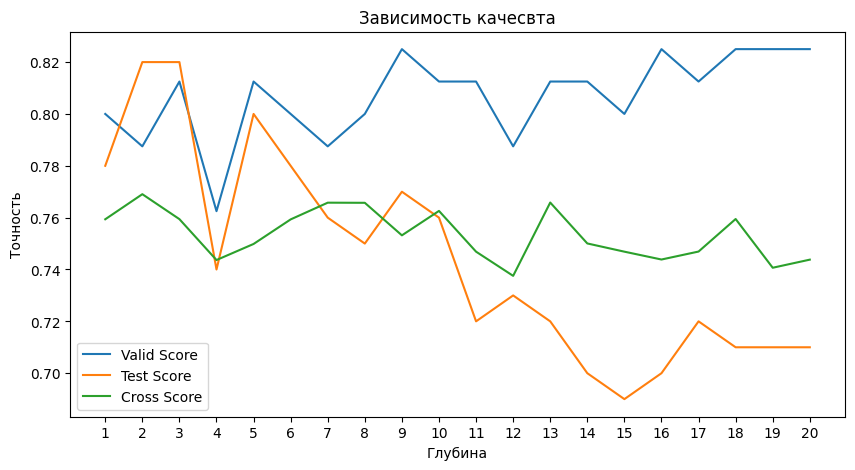

In [21]:
max_depth_range = range(1, 21)
valid_scores = []
test_scores = []

param_grid = {
    'max_depth': max_depth_range
}

x_train_crop, x_test_crop, y_train_crop, y_test_crop = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_crop, y_train_crop)

grid_scores = grid_search.cv_results_['mean_test_score']

for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(x_train_crop, y_train_crop)
    valid_scores.append(clf.score(x_test_crop, y_test_crop))
    test_scores.append(clf.score(x_test, y_test))


plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, valid_scores, label='Valid Score')
plt.plot(max_depth_range, test_scores, label='Test Score')
plt.plot(max_depth_range, grid_scores, label='Cross Score')
plt.xlabel('Глубина')
plt.ylabel('Точность')
plt.title('Зависимость качесвта')
plt.xticks(max_depth_range)
plt.legend()
plt.show()

## Исследование на улучшение результата при обрезке дерева

Оптимальная глубина дерева: 3
Точность на контрольной выборке с обрезкой дерева: 0.8200
Точность на контрольной выборке без обрезки дерева: 0.7300


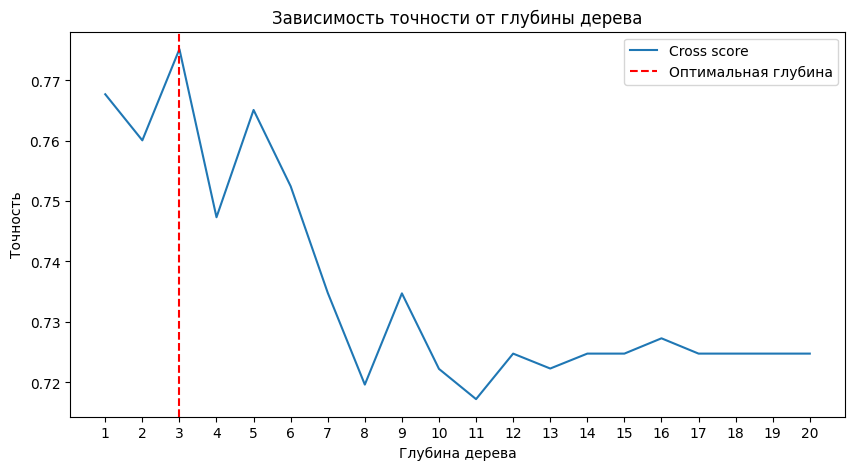

In [22]:
# определение диапазона глубины дерева
max_depth_range = range(1, 21)

# перекрестная проверка для подбора оптимальной глубины дерева
param_grid = {'max_depth': max_depth_range}
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# получение результатов перекрестной проверки
grid_scores = grid_search.cv_results_['mean_test_score']
best_max_depth = grid_search.best_params_['max_depth']

# обучение модели с оптимальной глубиной дерева
clf_best = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
clf_best.fit(x_train, y_train)
best_test_score = clf_best.score(x_test, y_test)

# обучение модели без ограничения глубины дерева (без обрезки)
clf_no_pruning = DecisionTreeClassifier(random_state=42)
clf_no_pruning.fit(x_train, y_train)
no_pruning_test_score = clf_no_pruning.score(x_test, y_test)

print(f"Оптимальная глубина дерева: {best_max_depth}")
print(f"Точность на контрольной выборке с обрезкой дерева: {best_test_score:.4f}")
print(f"Точность на контрольной выборке без обрезки дерева: {no_pruning_test_score:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, grid_scores, label='Cross score')
plt.axvline(x=best_max_depth, color='r', linestyle='--', label='Оптимальная глубина')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.title('Зависимость точности от глубины дерева')
plt.xticks(max_depth_range)
plt.legend()
plt.show()

## Сравнение результатов

In [ ]:
data_test['Survived'] = np.nan
x_test_t = data_test.drop(['PassengerId', 'Survived'], axis=1)
y_pred_test = clf_best.predict(x_test_t)
data_test['Survived'] = y_pred_test
data_test_response = data_test[['PassengerId', 'Survived']]
data_test_response.to_csv('response_for_5_clf.csv', index=False)

public score у лучшей логистической регрессии 0.79147 

public score у обрезанного дерева с оптимальной глубиной 0.77725

см. фото

# Для четвертой работы

## Обработка данных

In [23]:
data_train = pd.read_csv('./practice4/data/train.csv')
data_test = pd.read_csv('./practice4/data/test.csv')

In [24]:
data_train.drop(columns=['Без.ремонта', 'Иные.перекрытия', 'Смешанные.стены'], inplace=True)
all_features_set = ['Монолитные.стены', 'Кирпичные.стены', 'Банк.1000', 'Кафе.1000', 'Панельные.стены', 'Смешанные.перекрытия', 'id', 'Деревянные.стены', 'Парковка', 'АЗС.1000', 'Бар.1000', 'Школа.1000']
data_train.drop(columns=all_features_set, inplace=True)


In [26]:
X = data_train.drop(columns=['Цена'])
Y = data_train['Цена']

selected_features = ['Общая.площадь', 'Стоматология.1000', 'Год.постройки', 'Евроремонт', 'Остановка.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Этаж', 'Одежда..1000', 'Косметический', 'Дизайнерский', 'Количество.комнат', 'Почта.1000', 'Супер3кет.1000']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train[selected_features]
x_test = x_test[selected_features]



## Построение и визуализация дерева решений

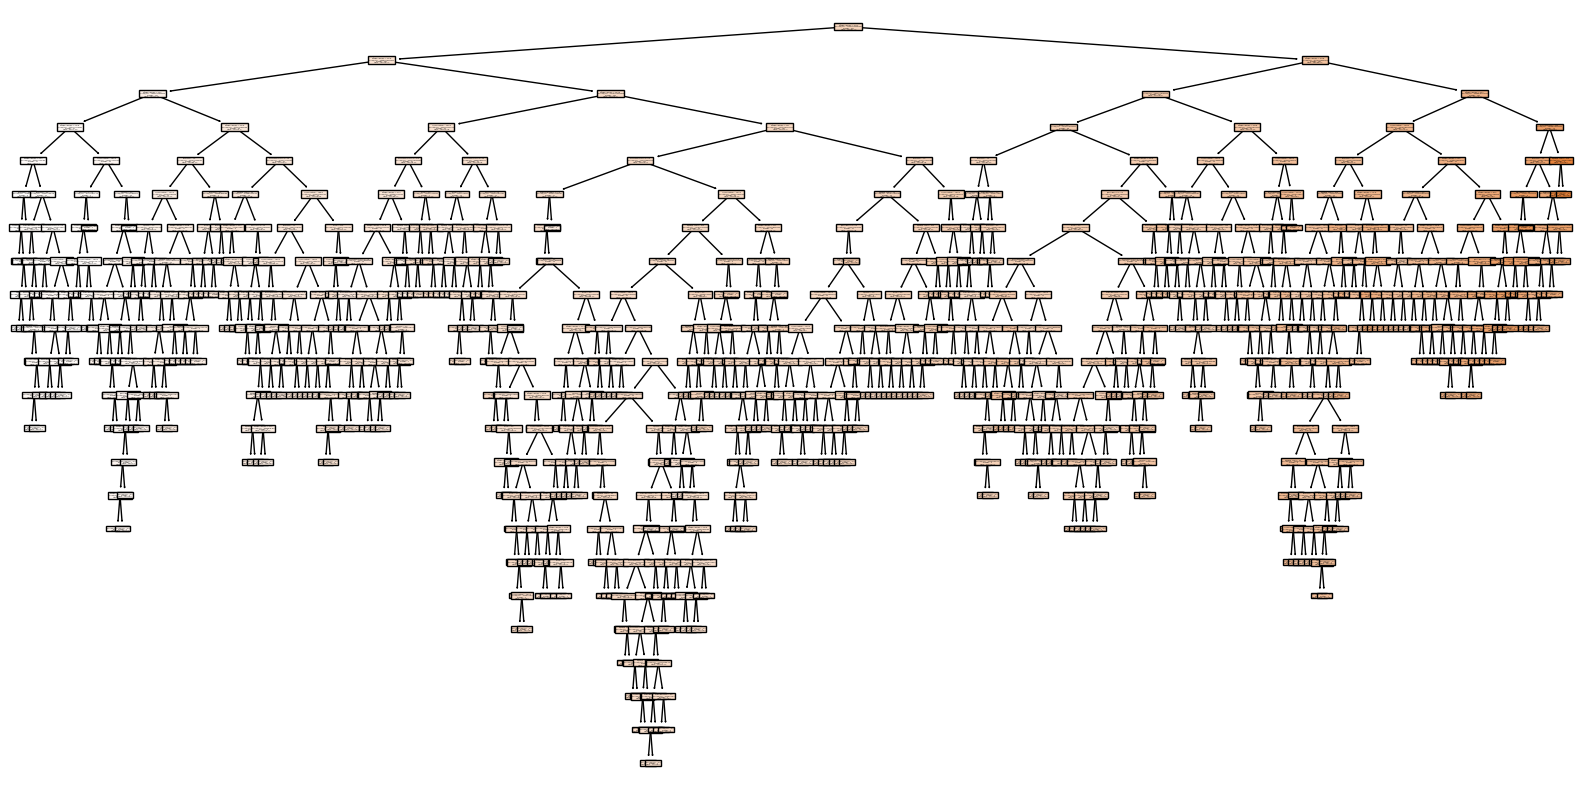

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.617907 to fit


'price_decision_tree.png'

In [27]:
# построение дерева решений
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dtr, filled=True, feature_names=x_train.columns)
plt.show()

# Экспорт дерева решений в формат dot
os.environ["PATH"] += os.pathsep + r'C:\Users\andre\Downloads\windows_10_cmake_Release_Graphviz-11.0.0-win64\Graphviz-11.0.0-win64\bin'

dot_data = export_graphviz(dtr, out_file=None, 
                           feature_names=x_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Преобразование dot в график
graph = graphviz.Source(dot_data)  

# Сохранение графика в файл
graph.render("price_decision_tree", format="png")


## Исследование зависимости качества прогнозирования

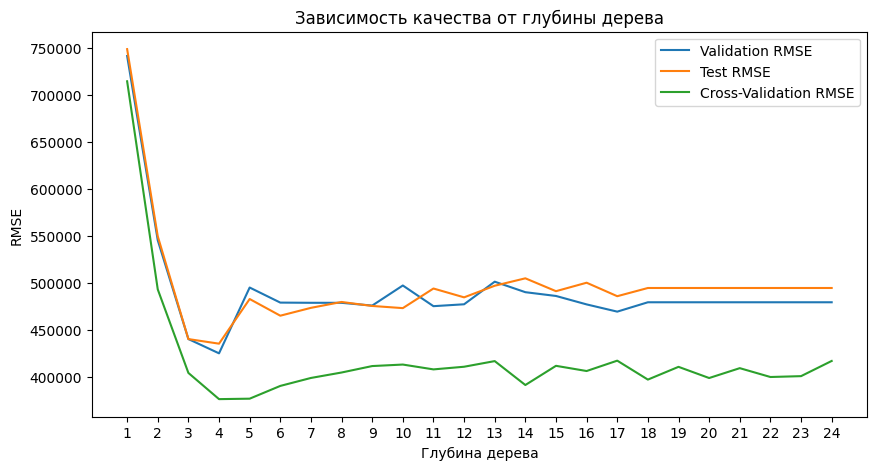

In [28]:
x_train_crop, x_test_crop, y_train_crop, y_test_crop = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Настраиваемые параметры
max_depth_range = range(1, 25)
valid_scores = []
test_scores = []

param_grid = {
    'max_depth': max_depth_range
}

# Перекрестная проверка для подбора оптимальной глубины дерева
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_crop, y_train_crop)

# Получение результатов перекрестной проверки
grid_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])

for max_depth in max_depth_range:
    dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dtr.fit(x_train_crop, y_train_crop)
    y_valid_pred = dtr.predict(x_test_crop)
    y_test_pred = dtr.predict(x_test)
    valid_scores.append(np.sqrt(mean_squared_error(y_test_crop, y_valid_pred)))
    test_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Построение графика зависимости RMSE от глубины дерева
plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, valid_scores, label='Validation RMSE')
plt.plot(max_depth_range, test_scores, label='Test RMSE')
plt.plot(max_depth_range, grid_scores, label='Cross-Validation RMSE')
plt.xlabel('Глубина дерева')
plt.ylabel('RMSE')
plt.title('Зависимость качества от глубины дерева')
plt.xticks(max_depth_range)
plt.legend()
plt.show()

## Исследование на улучшение результата при обрезке дерева

Оптимальная глубина дерева: 6
RMSE на контрольной выборке с обрезкой дерева: 423331.3584
RMSE на контрольной выборке без обрезки дерева: 471364.4732


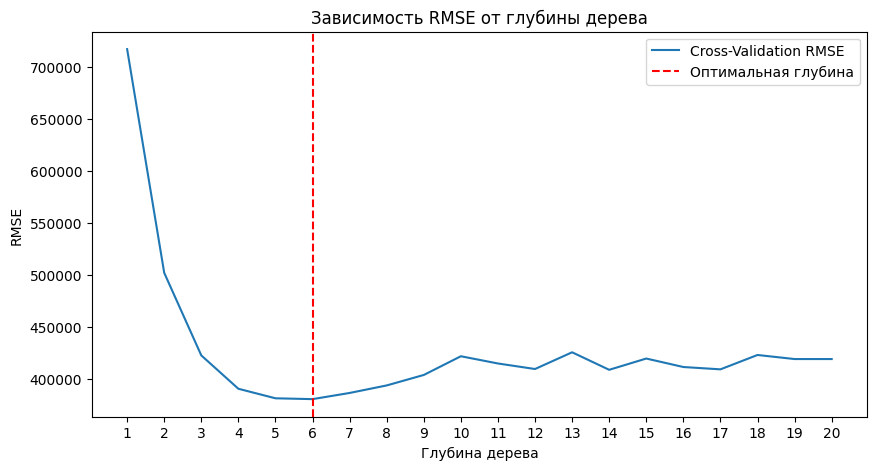

In [29]:
# Определение диапазона глубины дерева
max_depth_range = range(1, 21)

# Перекрестная проверка для подбора оптимальной глубины дерева
param_grid = {'max_depth': max_depth_range}
clf = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Получение результатов перекрестной проверки
grid_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])
best_max_depth = grid_search.best_params_['max_depth']

# Обучение модели с оптимальной глубиной дерева
clf_best = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
clf_best.fit(x_train, y_train)
y_test_pred_best = clf_best.predict(x_test)
best_test_score = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

# Обучение модели без ограничения глубины дерева (без обрезки)
clf_no_pruning = DecisionTreeRegressor(random_state=42)
clf_no_pruning.fit(x_train, y_train)
y_test_pred_no_pruning = clf_no_pruning.predict(x_test)
no_pruning_test_score = np.sqrt(mean_squared_error(y_test, y_test_pred_no_pruning))

print(f"Оптимальная глубина дерева: {best_max_depth}")
print(f"RMSE на контрольной выборке с обрезкой дерева: {best_test_score:.4f}")
print(f"RMSE на контрольной выборке без обрезки дерева: {no_pruning_test_score:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, grid_scores, label='Cross-Validation RMSE')
plt.axvline(x=best_max_depth, color='r', linestyle='--', label='Оптимальная глубина')
plt.xlabel('Глубина дерева')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от глубины дерева')
plt.xticks(max_depth_range)
plt.legend()
plt.show()

## Сравнение результатов

In [30]:
data_test.drop(columns=['Без.ремонта', 'Иные.перекрытия', 'Смешанные.стены'], inplace=True)
data_T = data_test.drop(columns=all_features_set)

Predict с помощью Линейной регрессии

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

predictions = linear_regressor.predict(data_T[selected_features])

submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': predictions
})

submission.to_csv('predictionc_linear_for_5.csv', index=False)

Predict с помощью дерева с оптимальной глубиной

In [ ]:
y_pred_tree = clf_best.predict(data_T[selected_features])
submission = pd.DataFrame({
    'id': data_test['id'],
    'Цена': y_pred_tree
})

submission.to_csv('predictionc_tree_for_5.csv', index=False)

private score rmse у линейной регрессии 286907.01157

private score rmse у обрезанного дерева с оптимальной глубиной 325082.64418

см. фото